### Imports

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
import warnings
warnings.filterwarnings('ignore')
import string
string.punctuation
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

### Read in training data (fake and real news stories)

In [2]:
real = pd.read_csv('True.csv')
real['label'] = 0
real.reset_index(drop=True)
real.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [3]:
fake = pd.read_csv('./Fake.csv')
fake['label'] = 1
fake.reset_index(drop=True)
display(fake.head())

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


### Merge the fake and real data sets together

In [4]:
data = pd.concat([real,fake],axis=0)
data=data.dropna()
display(data.head())
display(data.tail())

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


,title,text,subject,date,label
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


### Make sure we have same number of features(X) as labels (y)

In [5]:
y=list(data['label'])
X=list(data['text'])
num_samples=len(y)
print(data)
X=X[:num_samples]
y=y[:num_samples]

                                                   title   
0      As U.S. budget fight looms, Republicans flip t...  \
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject   
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews  \
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv... 

### Use tf-idf vectorizer to get word counts

In [6]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

### Split into train/test data

### (Save 1/3 data for testing)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.33, random_state=42)

### Train a logistic regression model

In [8]:

model = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
model.fit(X_train, y_train)

LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

### Run model on test data (save 1/3 data for testing)

### Run model on test data

In [9]:
y_test_predictions = model.predict(X_test.toarray())

### Plot confusion matrix and metrics

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7100
           1       1.00      0.99      1.00      7717

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



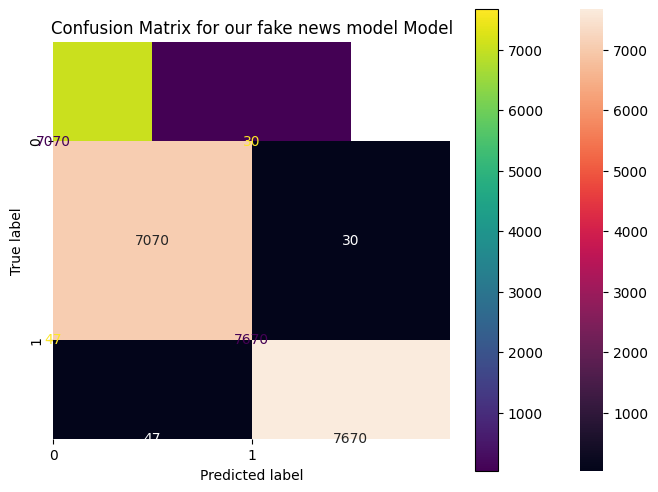

In [10]:
conf_matrix = confusion_matrix(y_test, y_test_predictions)
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )
display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
ax.set(title='Confusion Matrix for our fake news model Model')
# Training classifier model 
# model validation
y_pred = model.predict(X_test.toarray())
print(classification_report(y_test, y_pred))
display.plot(ax=ax);

### What words appeared the most?

In [11]:
vectorizer.vocabulary_


{'washington': 116845,
 'reuters': 92503,
 'the': 107802,
 'head': 50414,
 'of': 79135,
 'conservative': 28119,
 'republican': 91943,
 'faction': 40799,
 'in': 54634,
 'congress': 27980,
 'who': 117993,
 'voted': 116034,
 'this': 108276,
 'month': 73144,
 'for': 43360,
 'huge': 52942,
 'expansion': 40246,
 'national': 75383,
 'debt': 31756,
 'to': 109171,
 'pay': 82549,
 'tax': 106796,
 'cuts': 30481,
 'called': 22361,
 'himself': 51611,
 'fiscal': 42526,
 'on': 79658,
 'sunday': 104909,
 'and': 12004,
 'urged': 114004,
 'budget': 21258,
 'restraint': 92289,
 '2018': 4152,
 'keeping': 60599,
 'with': 118619,
 'sharp': 98572,
 'pivot': 84411,
 'under': 112677,
 'way': 117035,
 'among': 11780,
 'republicans': 91947,
 'representative': 91876,
 'mark': 68798,
 'meadows': 70194,
 'speaking': 102105,
 'cbs': 23695,
 'face': 40718,
 'nation': 75382,
 'drew': 35959,
 'hard': 49810,
 'line': 65522,
 'federal': 41649,
 'spending': 102231,
 'which': 117829,
 'lawmakers': 64093,
 'are': 13250,
 'b

### Save to disk model

In [12]:
import pickle
# save
with open('fake_news_model.pkl','wb') as f:
    pickle.dump(model,f)

In [ ]:
# to read in model
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

clf2.predict(X[0:1])